In [1]:
###################################################
# Vytvorenie histogramov pre nominálne atribúty
###################################################

In [2]:
!pip install findspark
!pip install pyspark
!apt-get install -qq openjdk-17-jdk-headless
from google.colab import drive

In [3]:
drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import findspark, os
findspark.init()
from pyspark.sql import SparkSession

#try:
#    spark.stop()
#except:
#    pass

#spark = SparkSession.builder.getOrCreate()

#CTRL + M : RESTART SESSION

spark = SparkSession.builder \
    .appName("Hist") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.sql.shuffle.partitions", "200") \
    .getOrCreate()


In [5]:
train = spark.read.parquet("./drive/MyDrive/dataset/train_without_missing.parquet")
test = spark.read.parquet("./drive/MyDrive/dataset/test_without_missing.parquet")


In [6]:
train.printSchema()

root
 |-- Police_Force: string (nullable = true)
 |-- Accident_Severity: string (nullable = true)
 |-- Number_of_Vehicles: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Local_Authority_(District): string (nullable = true)
 |-- 1st_Road_Class: string (nullable = true)
 |-- Road_Type: string (nullable = true)
 |-- Speed_limit: integer (nullable = true)
 |-- Junction_Detail: string (nullable = true)
 |-- Junction_Control: string (nullable = true)
 |-- Pedestrian_Crossing-Human_Control: string (nullable = true)
 |-- Pedestrian_Crossing-Physical_Facilities: string (nullable = true)
 |-- Light_Conditions: string (nullable = true)
 |-- Weather_Conditions: string (nullable = true)
 |-- Road_Surface_Conditions: string (nullable = true)
 |-- Special_Conditions_at_Site: string (nullable = true)
 |-- Carriageway_Hazards: string (nullable = true)
 |-- Urban_or_Rural_Area: string (nullable = true)
 |-- Did_Police_Officer_Attend_Scene_of_Accident: string (nullabl

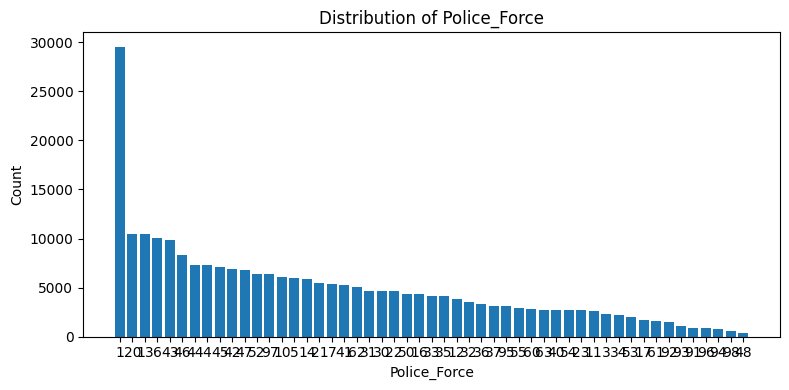

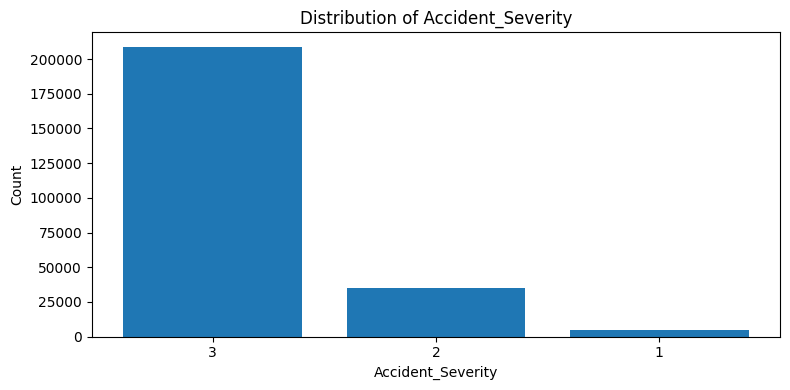

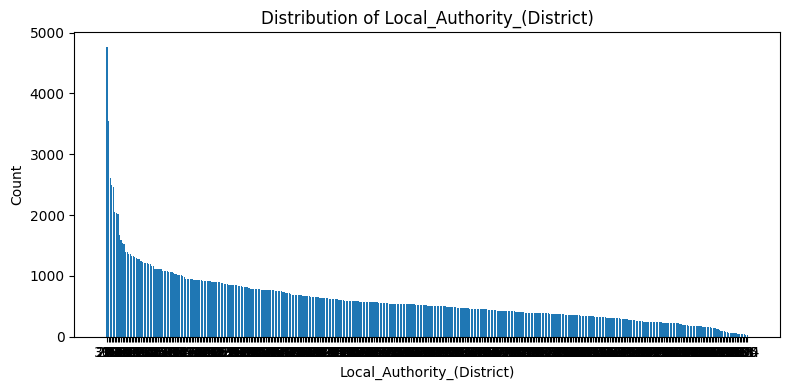

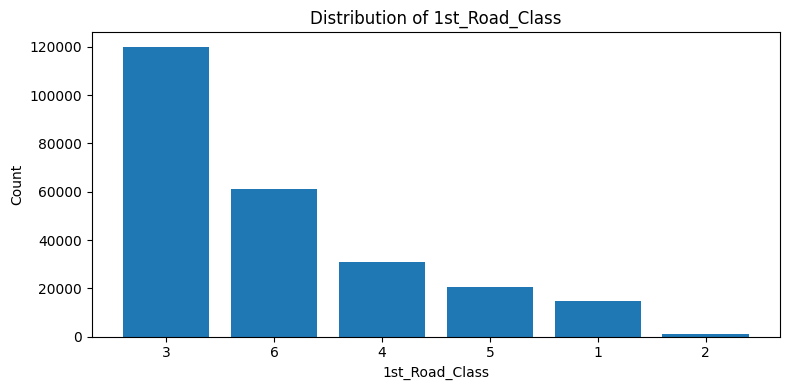

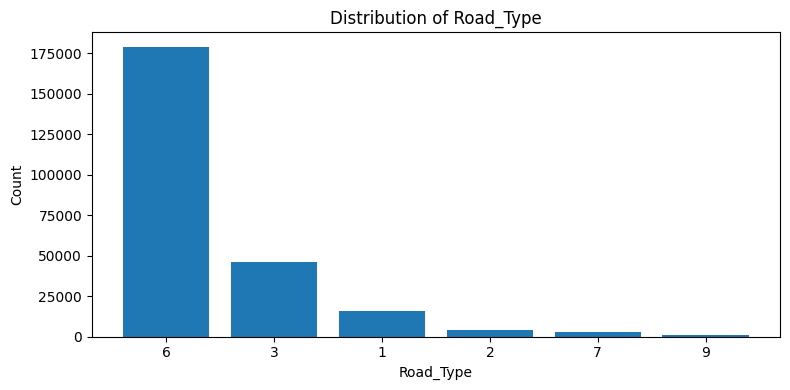

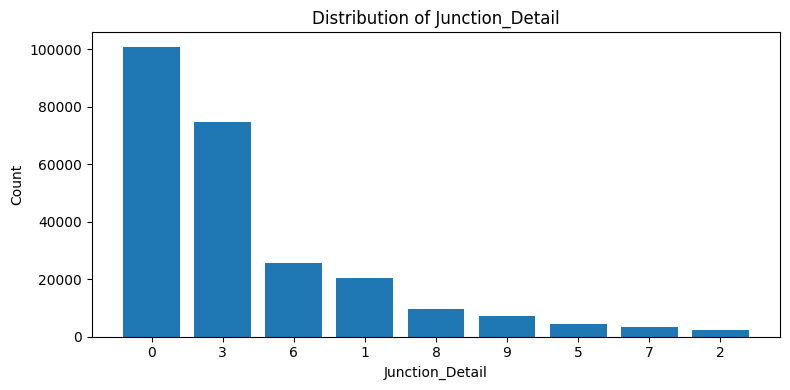

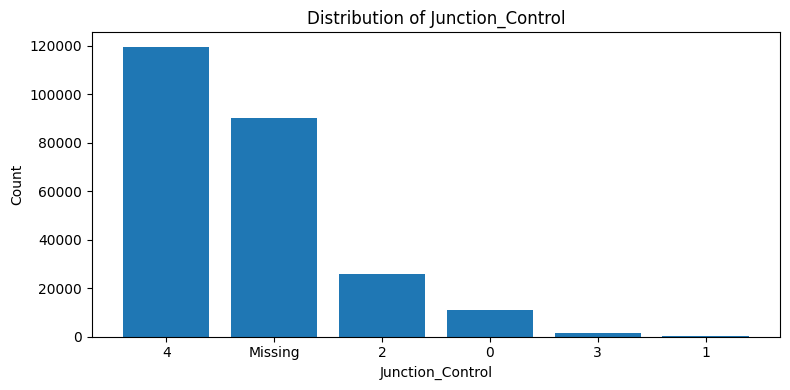

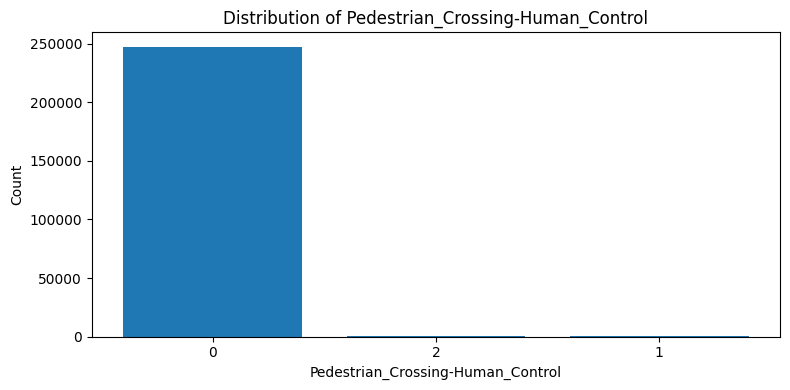

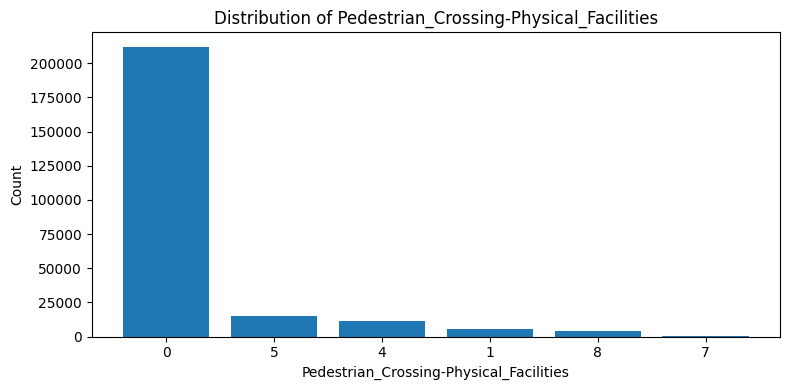

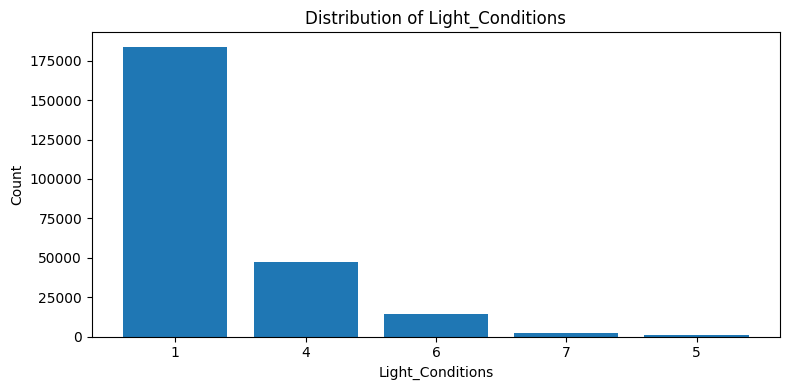

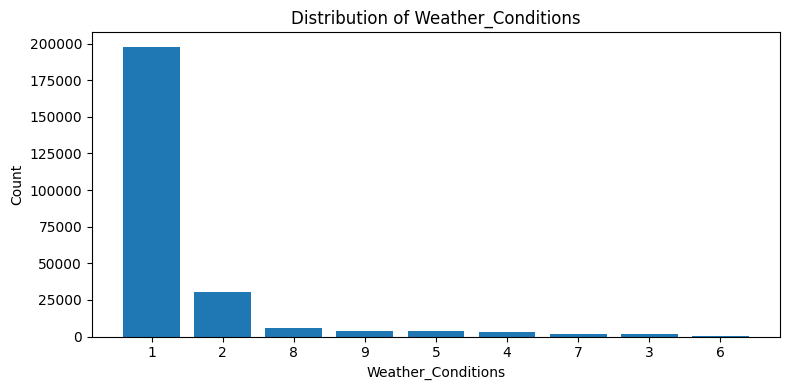

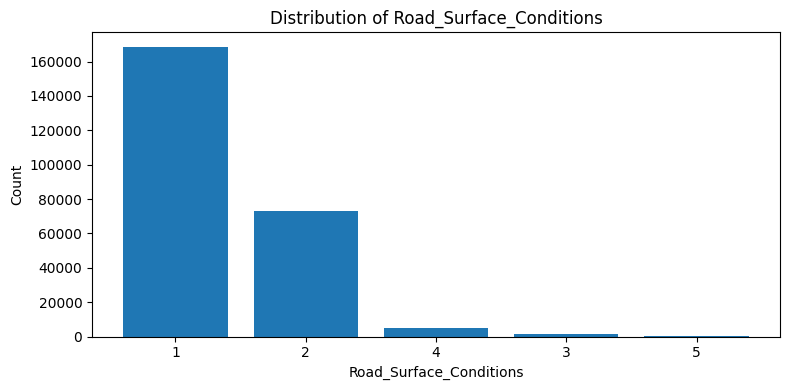

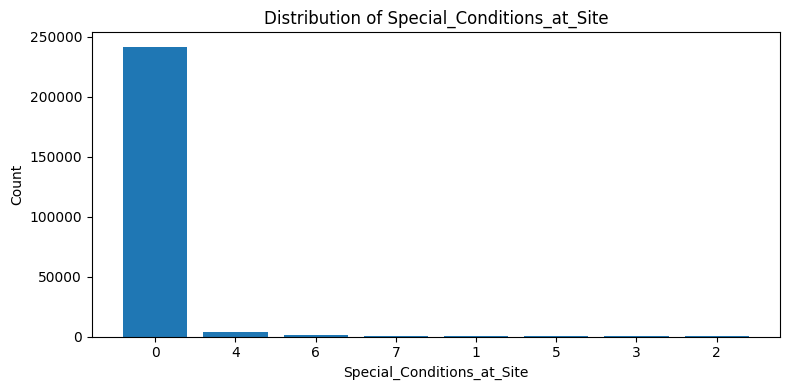

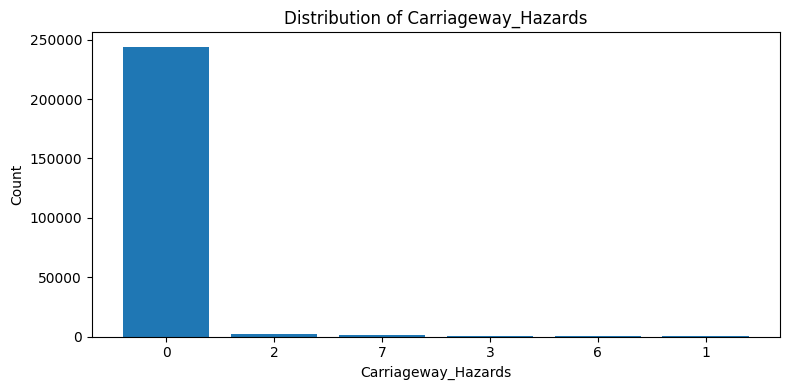

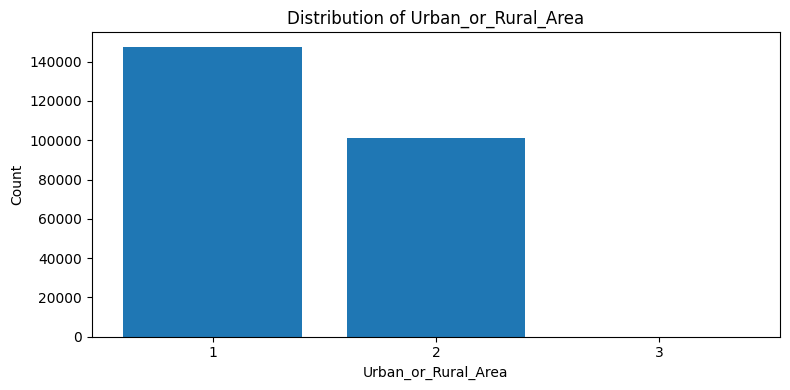

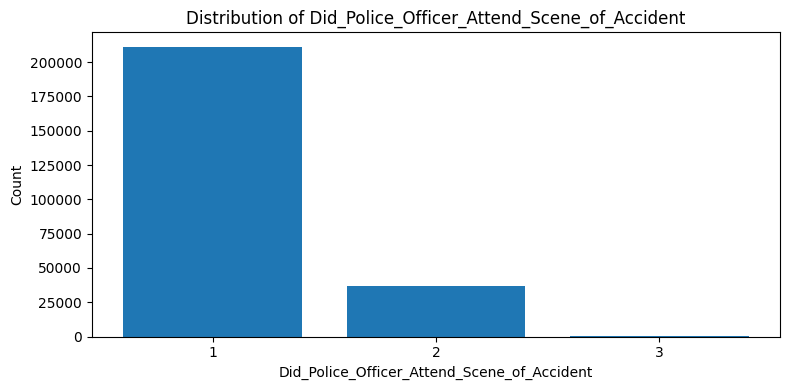

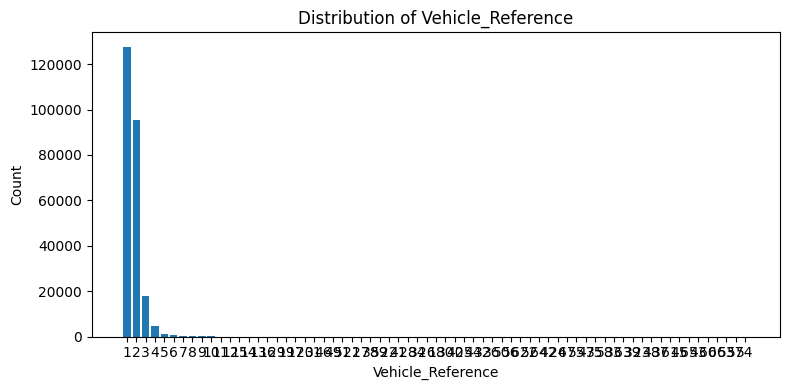

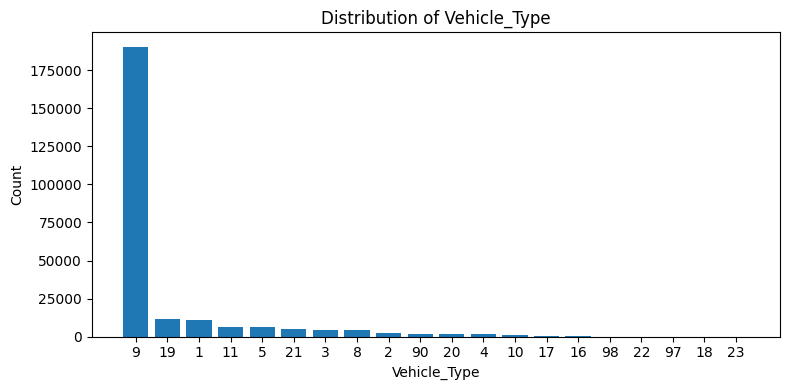

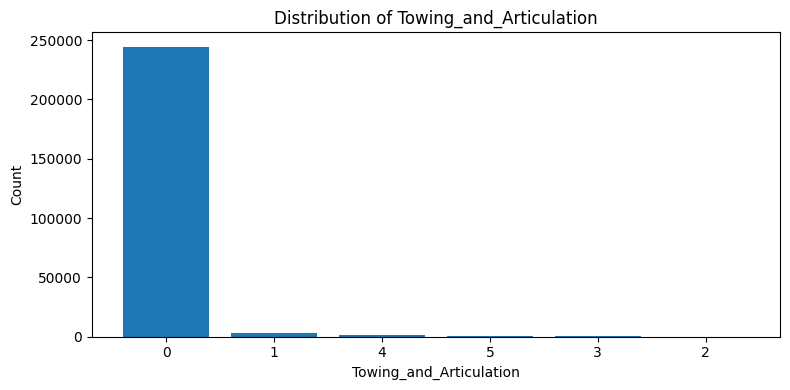

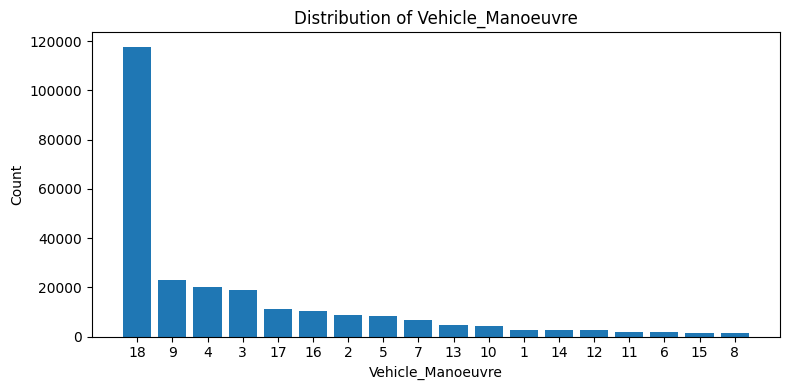

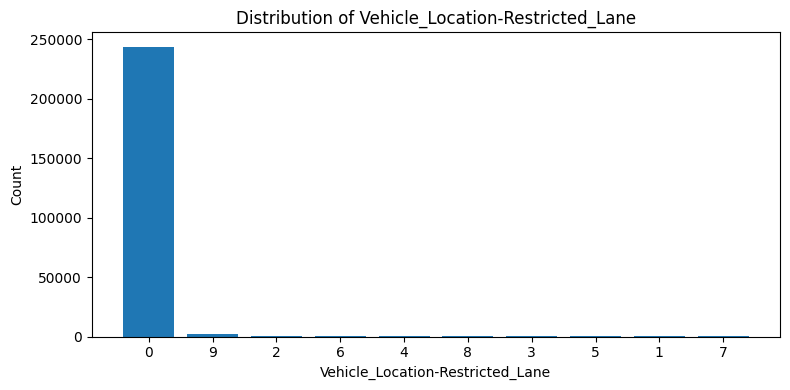

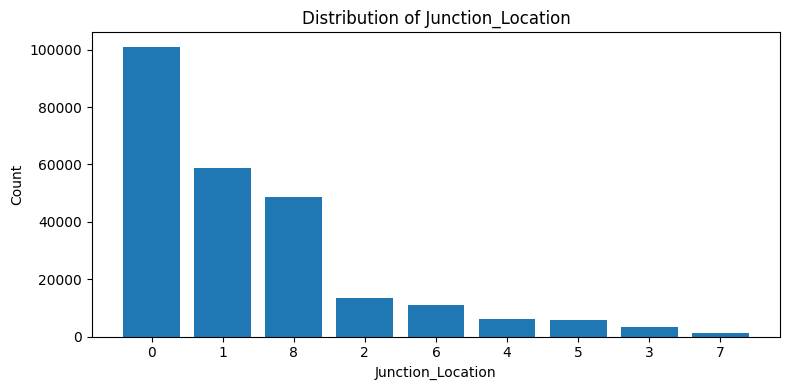

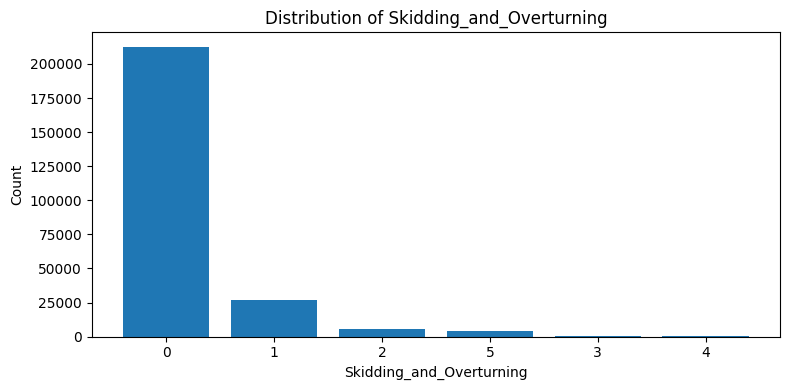

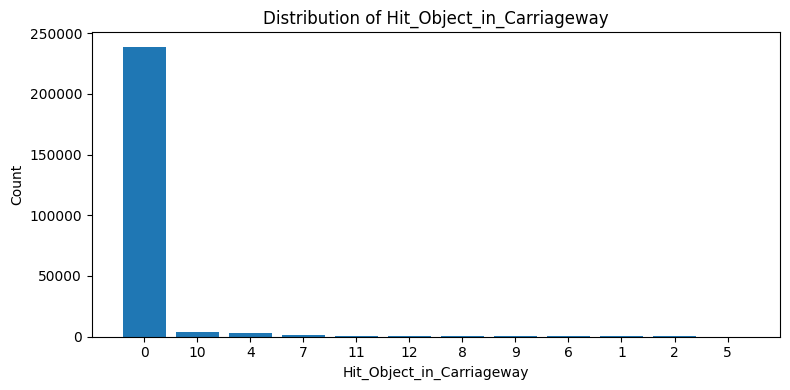

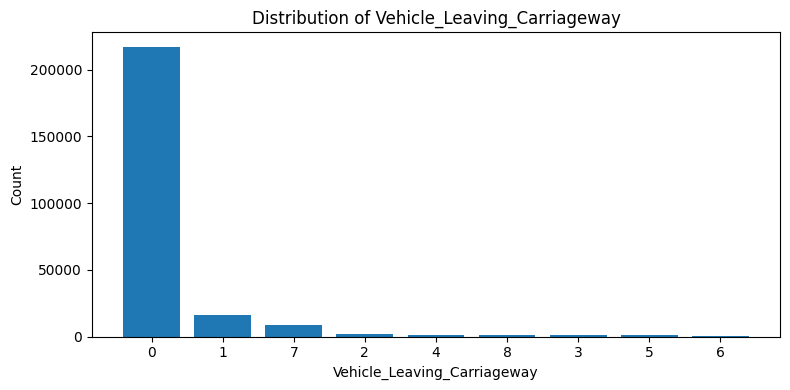

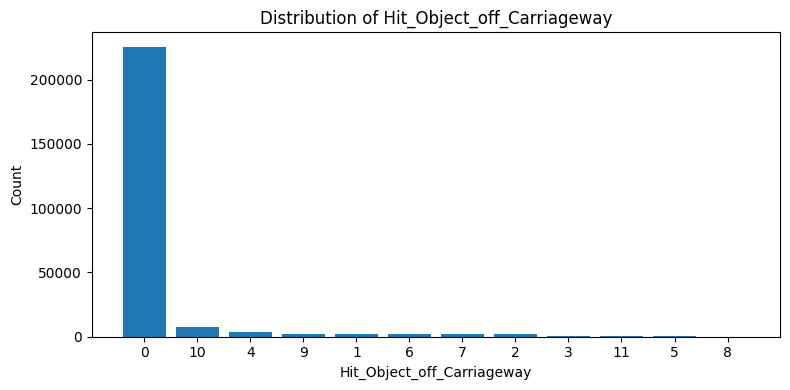

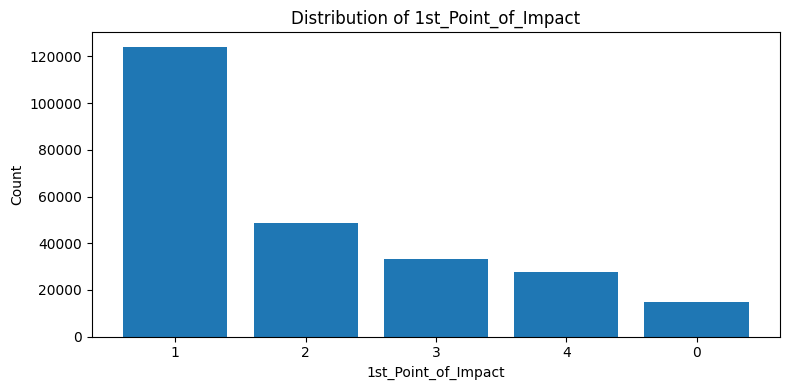

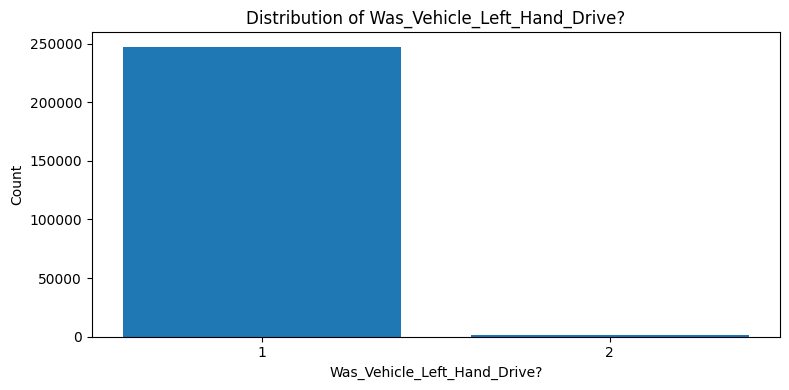

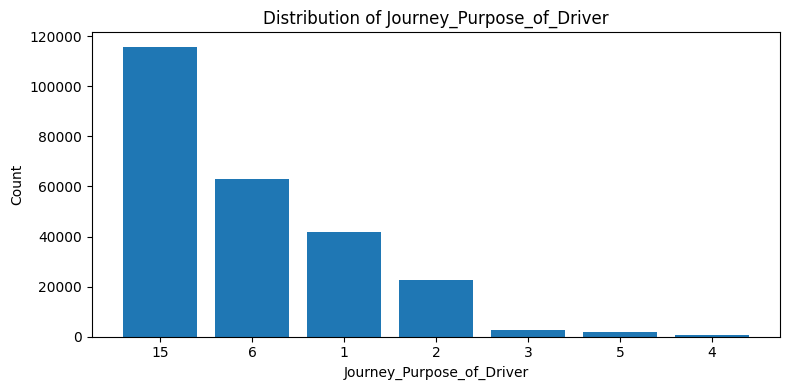

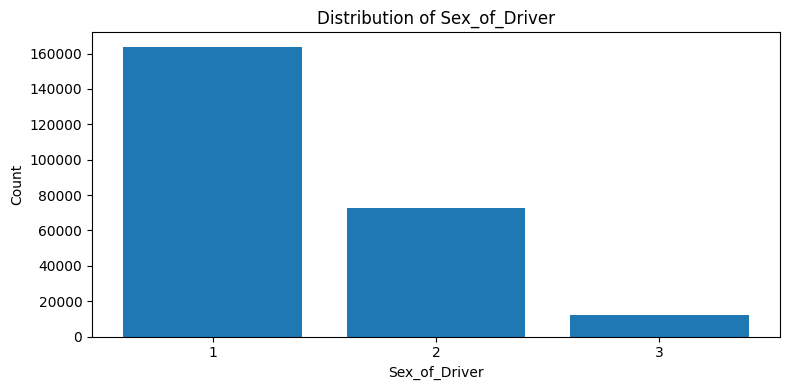

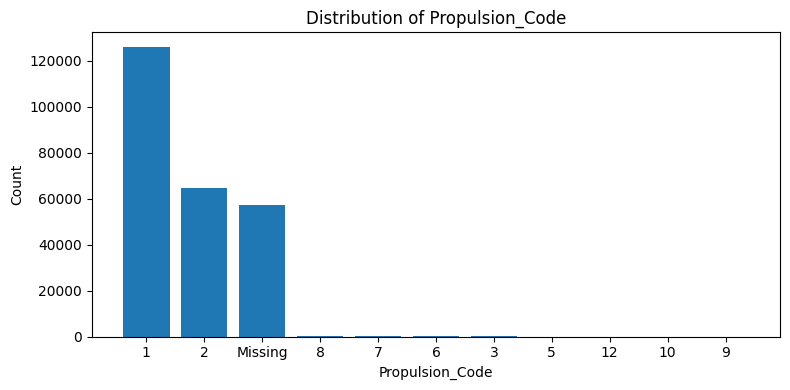

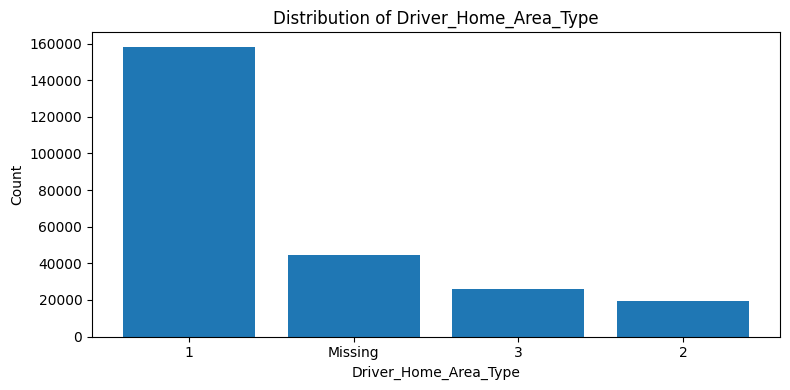

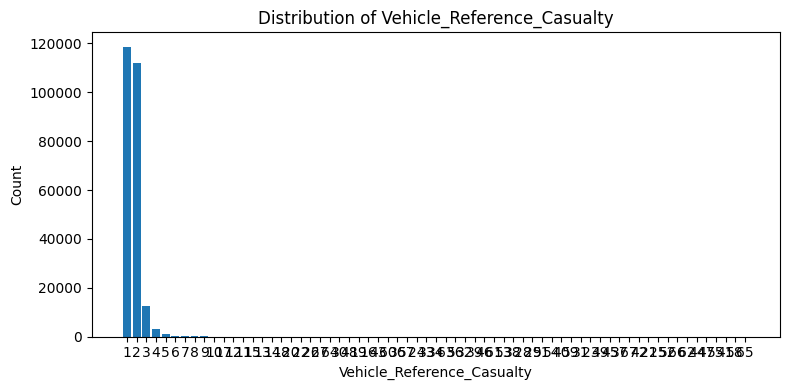

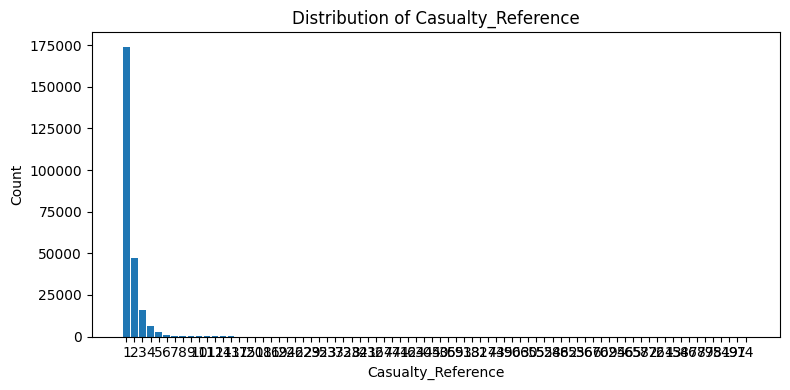

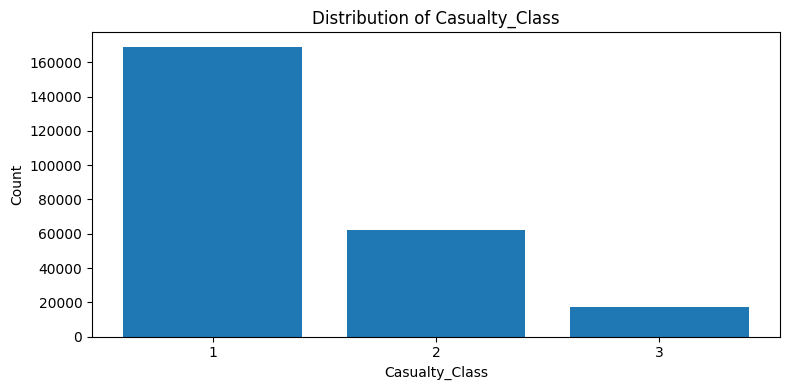

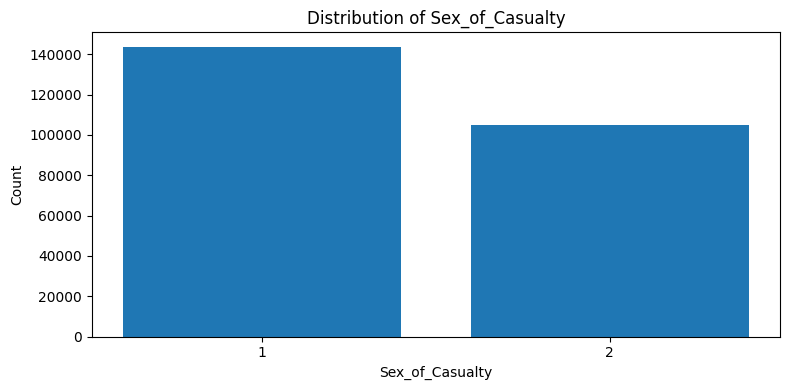

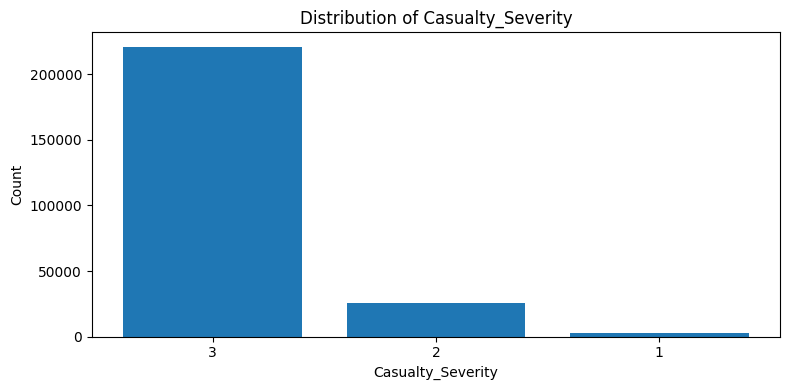

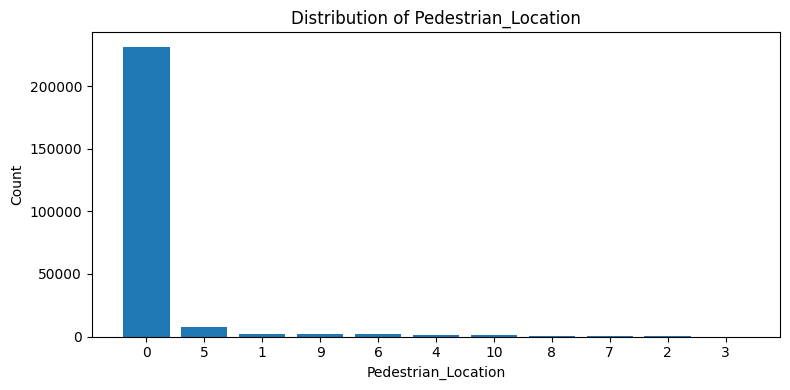

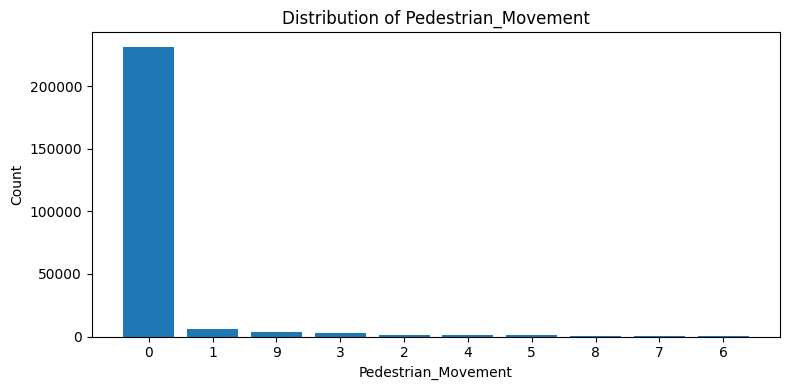

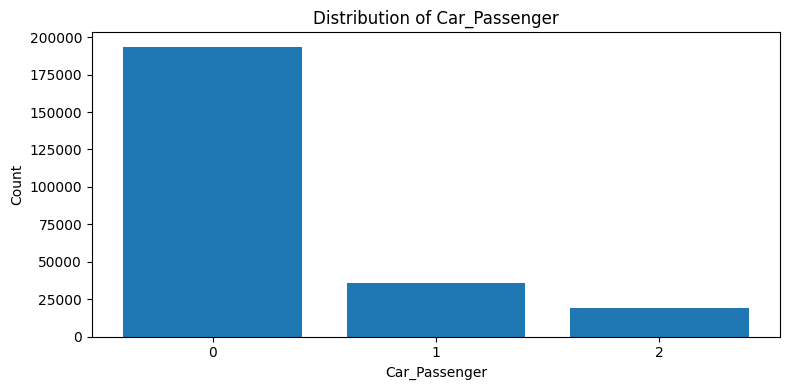

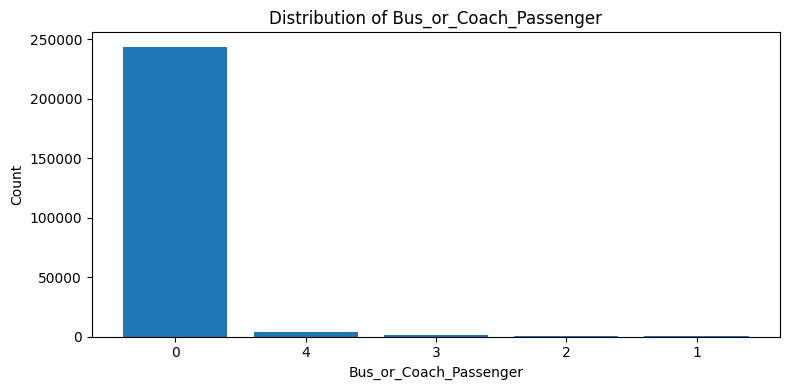

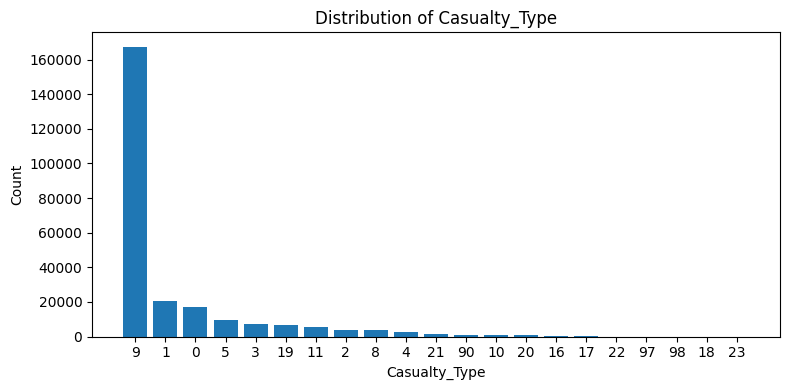

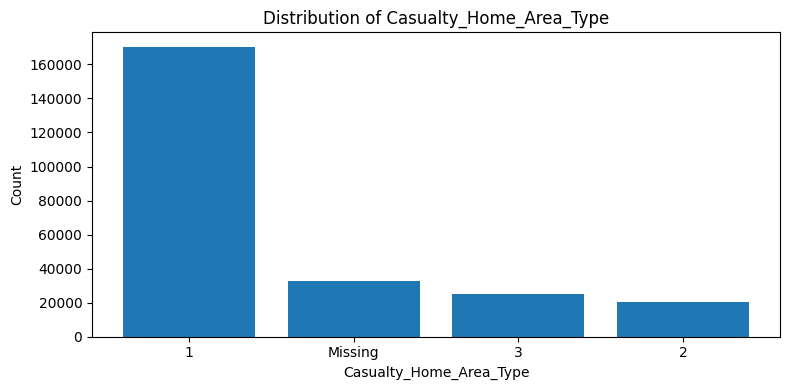

In [10]:
import matplotlib.pyplot as plt

categorical_columns = [col_name for col_name, dtype in train.dtypes if dtype == "string"]

for col in categorical_columns:
    df = train.groupBy(col).count().toPandas().sort_values(by="count", ascending=False)
    plt.figure(figsize=(8, 4))
    plt.bar(df[col].astype(str), df["count"])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
